# 1. Convolution

***Exécution et Résultat Attendu :

Signal 1 : Une courbe discrète avec les points [1,2,3,4,5].

Signal 2 : Une courbe discrète avec les points [2,1,0].

Résultat de la convolution :

Une courbe discrète représentant les valeurs obtenues par la convolution, qui seront :

                    resultat=[2,5,8,11,14,5,0]
                    
Les calculs sont effectués comme suit :

y[0]=1⋅2=2
y[1]=1⋅1+2⋅2=5
y[2]=1⋅0+2⋅1+3⋅2=8
y[3]=2⋅0+3⋅1+4⋅2=11
y[4]=3⋅0+4⋅1+5⋅2=14
y[5]=4⋅0+5⋅1=5
y[6]=5⋅0=0


# Autre méthode

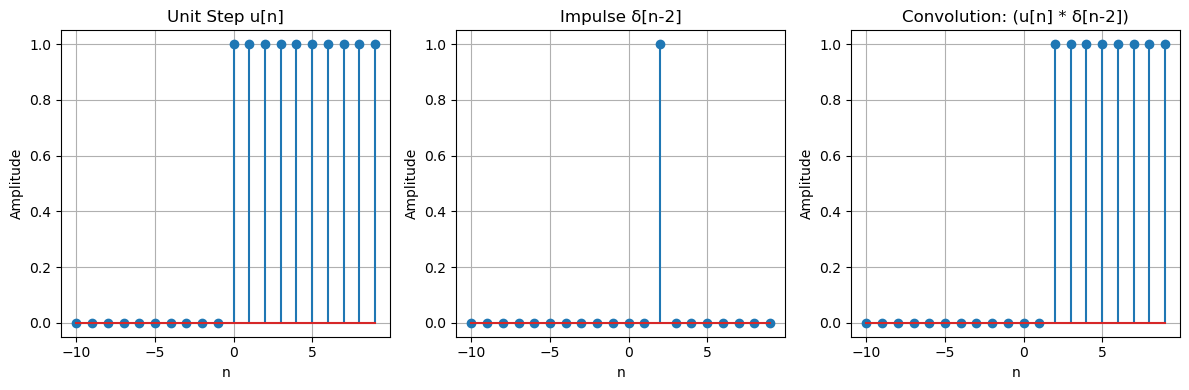

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
n = np.arange(-10, 10, 1)

# Create unit step function u[n]
def u(n):
    return np.heaviside(n, 1)

# Create delta function δ[n-2]
def delta(n, k):
    return np.array([1 if i == k else 0 for i in n])

# Generate signals
u_n = u(n)
delta_n = delta(n, 2)  # δ[n-2]

# Plot signals
plt.figure(figsize=(12, 4))

# Plot u[n]
plt.subplot(1, 3, 1)
plt.stem(n, u_n)
plt.title('Unit Step u[n]')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Amplitude')

# Plot δ[n-2]
plt.subplot(1, 3, 2)
plt.stem(n, delta_n)
plt.title('Impulse δ[n-2]')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Amplitude')

# Perform convolution
# The convolution of u[n] with δ[n-2] is just u[n-2]
n_conv = np.arange(-10, 10, 1)
conv_result = u(n_conv - 2)  # Shift the unit step by 2

plt.subplot(1, 3, 3)
plt.stem(n_conv, conv_result)
plt.title('Convolution: (u[n] * δ[n-2])')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# 2. Fast Fourier Transformation (FFT)


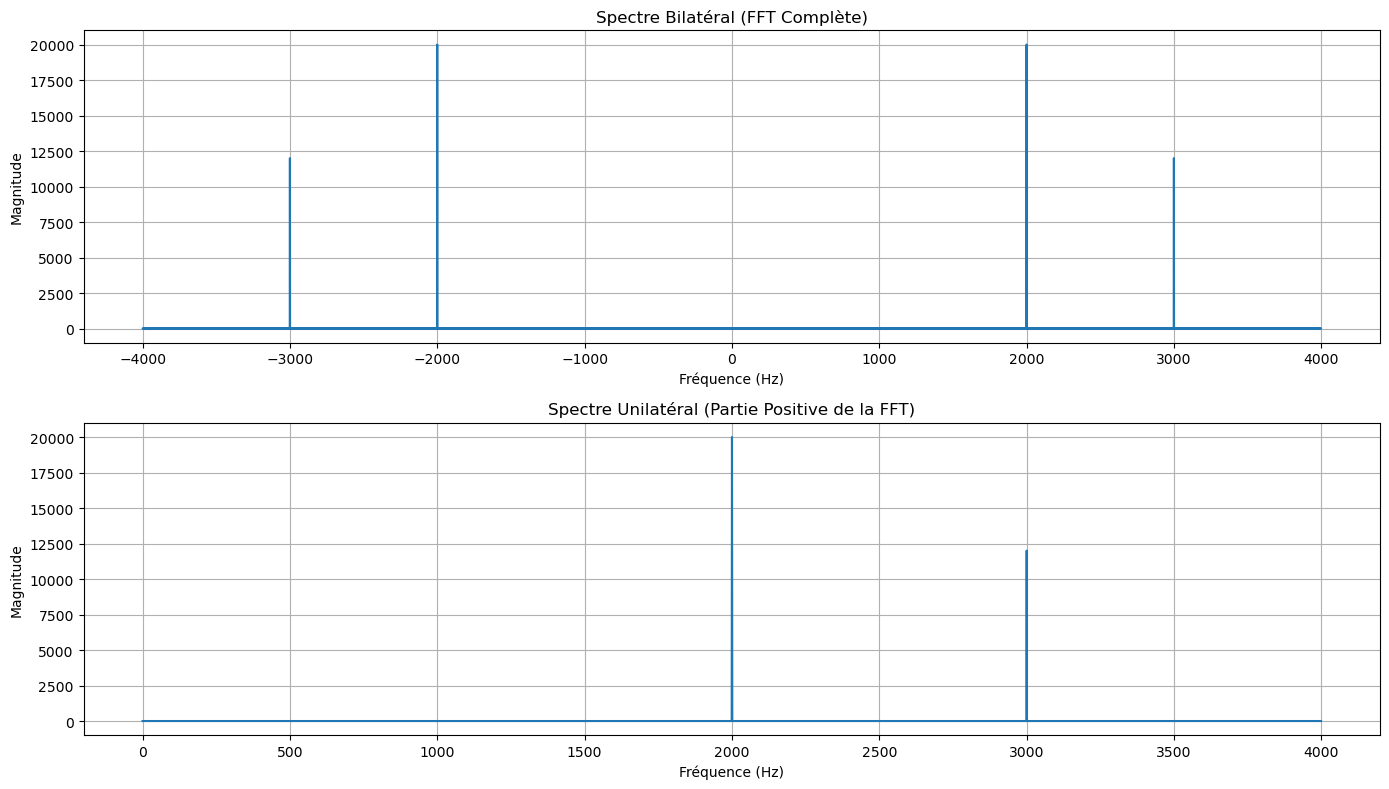

In [2]:
import numpy as np  # Importation de la bibliothèque NumPy pour les calculs numériques
import matplotlib.pyplot as plt  # Importation de Matplotlib pour la visualisation graphique

# Créer un signal exemple (par exemple, une somme de sinusoïdes)
fs = 8000  # Fréquence d'échantillonnage (en Hz), ici 8000 échantillons par seconde
T = 1/fs   # Période d'échantillonnage, l'inverse de la fréquence d'échantillonnage
t = np.arange(0, 1, T)  # Vecteur de temps, allant de 0 à 1 seconde avec un pas de T

# Signal de test : une combinaison de deux sinusoïdes
f1 = 2000   # Fréquence de la première sinusoïde (en Hz)
f2 = 3000  # Fréquence de la deuxième sinusoïde (en Hz)
# Création d'un signal x comme une combinaison de deux sinusoïdes
x = 5.0 * np.cos(2 * np.pi * f1 * t) + 3.0 * np.cos(2 * np.pi * f2 * t)

# Calculer la FFT bilatérale (complet), qui inclut à la fois les fréquences positives et négatives
X_bilateral = np.fft.fft(x)  # Applique la transformée de Fourier discrète à x

# Calculer les fréquences correspondantes pour chaque échantillon de la FFT
n = len(x)  # n est la taille du signal x (nombre d'échantillons)
frequencies = np.fft.fftfreq(n, T)  # La fonction fftfreq renvoie les fréquences associées aux indices de la FFT

# Spectre bilatéral : on prend la magnitude des valeurs de la FFT
X_bilateral_magnitude = np.abs(X_bilateral)  # np.abs() donne la magnitude (valeur absolue) des coefficients FFT

# Calculer la FFT unilatérale (partie positive seulement)
X_unilateral = X_bilateral[:n//2]  # La FFT est symétrique, on ne garde que la première moitié (fréquences positives)
frequencies_unilateral = frequencies[:n//2]  # On garde aussi que les fréquences positives correspondantes

# Spectre unilatéral : on prend la magnitude de la partie unilatérale de la FFT
X_unilateral_magnitude = np.abs(X_unilateral)  # Calcul de la magnitude pour le spectre unilatéral

# Tracer les spectres sur deux sous-graphes
plt.figure(figsize=(14, 8))  # Crée une figure de taille 14x8 pouces pour les graphiques

# Tracer le spectre bilatéral dans la première partie de la figure
plt.subplot(2, 1, 1)  # Divise la figure en 2 lignes et 1 colonne, et sélectionne la première partie
plt.plot(frequencies, X_bilateral_magnitude)  # Tracer la magnitude de la FFT bilatérale en fonction des fréquences
plt.title("Spectre Bilatéral (FFT Complète)")  # Titre du graphique
plt.xlabel("Fréquence (Hz)")  # Label de l'axe x (fréquences)
plt.ylabel("Magnitude")  # Label de l'axe y (amplitude)
plt.grid(True)  # Ajoute une grille pour mieux lire les valeurs

# Tracer le spectre unilatéral dans la deuxième partie de la figure
plt.subplot(2, 1, 2)  # Sélectionne la deuxième partie de la figure
plt.plot(frequencies_unilateral, X_unilateral_magnitude)  # Tracer la magnitude du spectre unilatéral
plt.title("Spectre Unilatéral (Partie Positive de la FFT)")  # Titre du graphique
plt.xlabel("Fréquence (Hz)")  # Label de l'axe x (fréquences)
plt.ylabel("Magnitude")  # Label de l'axe y (amplitude)
plt.grid(True)  # Ajoute une grille

# Afficher les deux graphiques
plt.tight_layout()  # Ajuste automatiquement l'espacement entre les sous-graphes pour éviter qu'ils ne se chevauchent
plt.show()  # Affiche les graphiques


# 3. Filter en convolution

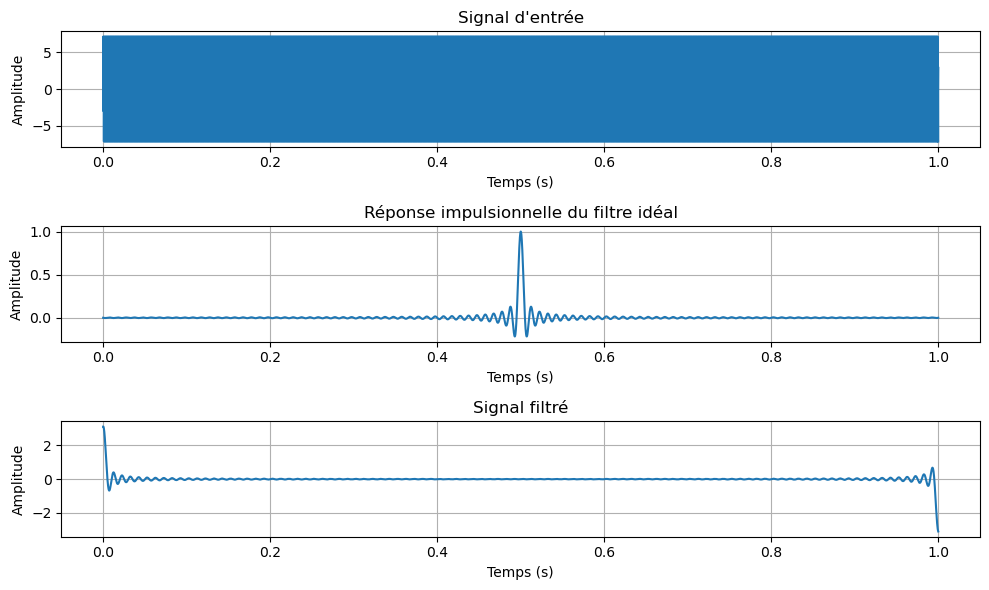

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
fs = 8000  # Fréquence d'échantillonnage en Hz
T = 1 / fs  # Période d'échantillonnage
t = np.arange(0, 1, T)  # Vecteur de temps

# Signal d'entrée : un mélange de différentes fréquences (signal sinusoïdal)
f1 = 2000  # Fréquence 1 (Hz)
f2 = 3000  # Fréquence 2 (Hz)
signal = 5.0 * np.sin(2 * np.pi * f1 * t) + 3.0 * np.sin(2 * np.pi * f2 * t)

# Filtre idéal passe-bas (réponse impulsionnelle)
cutoff = 100  # Fréquence de coupure du filtre idéal en Hz
# Calculer la réponse impulsionnelle idéale (fenêtre de taille 100)
N = 101  # Taille de la fenêtre
h = np.sinc(2 * cutoff * (t - t[len(t) // 2]))  # Réponse impulsionnelle idéale (sinc)


# Convolution du signal avec la réponse impulsionnelle du filtre
filtered_signal = np.convolve(signal, h, mode='same')  # Convolution

# Tracer les signaux
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title("Signal d'entrée")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, h)
plt.title("Réponse impulsionnelle du filtre idéal")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title("Signal filtré")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()
